# Exploration of ENRON Dataset
#### by Dirk Kadijk


## Table of Contents

 1. Introduction
 2. Data Gathering
 3. Data Assessing + Cleaning
 4. Exploration Data Analysis (EDA)
    - Univariate
    - Bivariate  
    - Multivariate
 5. Conclusions
 



<br><br>
# 1. Introduction  

TStarter project code for students taking Udacity ud120.

The whole project idea is from Udacity's Introduction to Machine Learning Course https://classroom.udacity.com/courses/ud120

### ENRON-DATA-Udacity

The dataset can be found in http://www.cs.cmu.edu/~./enron/ 

The [Enron Corpus](https://en.wikipedia.org/wiki/Enron_Corpus) is a large database of over 600,000 emails generated by 158 employees of the Enron Corporation and acquired by the Federal Energy Regulatory Commission during its investigation after the company's collapse.


# 2. Gather the Enron data

In [130]:
import sys
import pickle
sys.path.append("../final_project/")

from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data

import pandas as pd
from matplotlib import pyplot as plt

### Task 1: Select what features you'll use. Features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
    
# enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "rb"))


In [131]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV                   #from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from time import time

In [132]:
# converting the given pickled Enron data to a pandas dataframe
enron_df = pd.DataFrame.from_records(list(data_dict.values()))

# set the index of df to be the employees series:
employees = pd.Series(list(data_dict.keys()))
enron_df.set_index(employees, inplace=True)
enron_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


<br><br>
# 2. Wrangle Enron data  (Assess + Clean)

In [133]:
print ("Size of the enron dataframe:",enron_df.shape)

Size of the enron dataframe: (146, 21)


In [134]:
print ("Number of data points(people) in the dataset:", len(enron_df))

Number of data points(people) in the dataset: 146


In [135]:
print ("To find the number of Features in the Enron Dataset : ",len(enron_df.columns))

To find the number of Features in the Enron Dataset :  21


In [136]:
poi_t = enron_df.groupby('poi').size()
poi_t

poi
False    128
True      18
dtype: int64

In [137]:
type(poi_t)

pandas.core.series.Series

In [138]:
print ("Total number of non-POI's in the given dataset : ",poi_t.iloc[0])

Total number of non-POI's in the given dataset :  128


In [139]:
print ("Total number of POI's in the given dataset : ",poi_t.iloc[1])

Total number of POI's in the given dataset :  18


So, in the given dataset there are 18 POI's and 128 non-POI's.  


In [140]:
enron_df.dtypes

salary                       object
to_messages                  object
deferral_payments            object
total_payments               object
loan_advances                object
bonus                        object
email_address                object
restricted_stock_deferred    object
deferred_income              object
total_stock_value            object
expenses                     object
from_poi_to_this_person      object
exercised_stock_options      object
from_messages                object
other                        object
from_this_person_to_poi      object
poi                            bool
long_term_incentive          object
shared_receipt_with_poi      object
restricted_stock             object
director_fees                object
dtype: object

In [141]:
# Coerce numeric values into floats or ints; also change NaN to zero:
enron_df_new = enron_df.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0)
enron_df_new.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,0.0,0.0,0.0,585062.0,...,38.0,0.0,29.0,1740.0,1.0,False,0.0,702.0,585062.0,0.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,0.0,-1386055.0,10623258.0,...,0.0,6680544.0,0.0,2660303.0,0.0,False,1586055.0,0.0,3942714.0,0.0
ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,0.0,350000.0,0.0,0.0,-400729.0,6678735.0,...,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,0.0,1788391.0,0.0
CORDES WILLIAM R,0.0,764.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1038185.0,...,10.0,651850.0,12.0,0.0,0.0,False,0.0,58.0,386335.0,0.0
HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,0.0,0.0,-3117011.0,6391065.0,...,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,0.0


In [142]:
enron_df_new.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
email_address                float64
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
dtype: object

Removing the column of __email_address__ from the enron_df as it is not of much used in this project.

In [143]:
# Dropping column 'email_address' as not required in analysis
enron_df_new.drop('email_address', axis = 1, inplace = True)
enron_df_new.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,0.0,0.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,False,0.0,702.0,585062.0,0.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,False,1586055.0,0.0,3942714.0,0.0
ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,0.0,350000.0,0.0,-400729.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,0.0,1788391.0,0.0
CORDES WILLIAM R,0.0,764.0,0.0,0.0,0.0,0.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,False,0.0,58.0,386335.0,0.0
HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,0.0,-3117011.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,0.0


In [144]:
# Checking the changed shape of df
enron_df_new.shape

(146, 20)

In [145]:
enron_df_new.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,146.000000,1.460000e+02,146.000000,1.460000e+02,146.000000,1.460000e+02,1.460000e+02
mean,3.658114e+05,1221.589041,4.387965e+05,4.350622e+06,1.149658e+06,1.333474e+06,2.051637e+04,-3.827622e+05,5.846018e+06,7.074827e+04,38.226027,4.182736e+06,358.602740,5.854318e+05,24.287671,6.646839e+05,692.986301,1.749257e+06,1.942249e+04
std,2.203575e+06,2226.770637,2.741325e+06,2.693448e+07,9.649342e+06,8.094029e+06,1.439661e+06,2.378250e+06,3.624681e+07,4.327163e+05,73.901124,2.607040e+07,1441.259868,3.682345e+06,79.278206,4.046072e+06,1072.969492,1.089995e+07,1.190543e+05
min,0.000000e+00,0.000000,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-7.576788e+06,-2.799289e+07,-4.409300e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-2.604490e+06,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,9.394475e+04,0.000000e+00,0.000000e+00,0.000000e+00,-3.792600e+04,2.288695e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,8.115000e+03,0.000000e+00
50%,2.105960e+05,289.000000,0.000000e+00,9.413595e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000e+00,9.659550e+05,2.018200e+04,2.500000,6.082935e+05,16.500000,9.595000e+02,0.000000,0.000000e+00,102.500000,3.605280e+05,0.000000e+00
75%,2.708505e+05,1585.750000,9.684500e+03,1.968287e+06,0.000000e+00,8.000000e+05,0.000000e+00,0.000000e+00,2.319991e+06,5.374075e+04,40.750000,1.714221e+06,51.250000,1.506065e+05,13.750000,3.750648e+05,893.500000,8.145280e+05,0.000000e+00
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,8.392500e+07,9.734362e+07,1.545629e+07,0.000000e+00,4.345095e+08,5.235198e+06,528.000000,3.117640e+08,14368.000000,4.266759e+07,609.000000,4.852193e+07,5521.000000,1.303223e+08,1.398517e+06


<br><br>
# 3. Explore / analyzing the features of Enron Dataset
## 3.1. Financial Features 

### 3.1.1. Bonus and Salary

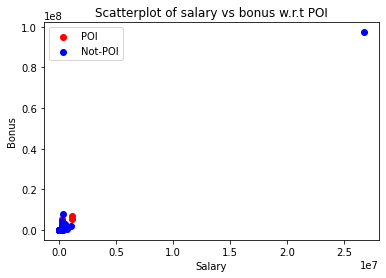

In [146]:
# Drawing scatterplot 

plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == True],enron_df_new['bonus'][enron_df_new['poi'] == True], color = 'r',
           label = 'POI')
plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == False],enron_df_new['bonus'][enron_df_new['poi'] == False],color = 'b',
           label = 'Not-POI')
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary vs bonus w.r.t POI")
plt.legend(loc='upper left')
plt.show()  

From the above figure, one point has high value of salary and bonus.

In [147]:
enron_df_new['salary'].argmax()

103

In [148]:
enron_df_new.loc['TOTAL',:]

salary                       2.67042e+07
to_messages                            0
deferral_payments            3.20834e+07
total_payments               3.09887e+08
loan_advances                 8.3925e+07
bonus                        9.73436e+07
restricted_stock_deferred   -7.57679e+06
deferred_income             -2.79929e+07
total_stock_value             4.3451e+08
expenses                      5.2352e+06
from_poi_to_this_person                0
exercised_stock_options      3.11764e+08
from_messages                          0
other                        4.26676e+07
from_this_person_to_poi                0
poi                                False
long_term_incentive          4.85219e+07
shared_receipt_with_poi                0
restricted_stock             1.30322e+08
director_fees                1.39852e+06
Name: TOTAL, dtype: object

In [149]:
enron_df_new.iloc()

## Removing Outlier 1 : 'TOTAL'
So the 'TOTAL' row is removed from the above df.

In [150]:
enron_df_new.drop('TOTAL', axis = 0, inplace = True)
enron_df_new.shape

(145, 20)

In [151]:
enron_df_new.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,1.450000e+02,145.000000,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,145.000000,145.000000,1.450000e+02,145.000000,1.450000e+02,145.000000,1.450000e+02,145.000000,1.450000e+02,145.000000
mean,1.841671e+05,1230.013793,2.205579e+05,2.243477e+06,5.787931e+05,6.713353e+05,7.291157e+04,-1.923475e+05,2.889718e+06,35131.372414,38.489655,2.061486e+06,361.075862,2.952100e+05,24.455172,3.346340e+05,697.765517,8.625464e+05,9911.489655
std,1.969598e+05,2232.153003,7.517046e+05,8.817819e+06,6.771012e+06,1.230148e+06,1.297469e+06,6.041174e+05,6.172223e+06,45247.175705,74.088359,4.781941e+06,1445.944684,1.127404e+06,79.527073,6.853639e+05,1075.128126,2.010852e+06,31202.712940
min,0.000000e+00,0.000000,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.787380e+06,-3.504386e+06,-4.409300e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-2.604490e+06,0.000000
25%,0.000000e+00,0.000000,0.000000e+00,9.109300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-3.666600e+04,2.211410e+05,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,2.105000e+05,312.000000,0.000000e+00,9.161970e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000e+00,9.558730e+05,18834.000000,4.000000,6.078370e+05,17.000000,9.470000e+02,0.000000,0.000000e+00,114.000000,3.605280e+05,0.000000
75%,2.690760e+05,1607.000000,7.961000e+03,1.934359e+06,0.000000e+00,8.000000e+05,0.000000e+00,0.000000e+00,2.282768e+06,53122.000000,41.000000,1.668260e+06,52.000000,1.504580e+05,14.000000,3.743470e+05,900.000000,6.989200e+05,0.000000
max,1.111258e+06,15149.000000,6.426990e+06,1.035598e+08,8.152500e+07,8.000000e+06,1.545629e+07,0.000000e+00,4.911008e+07,228763.000000,528.000000,3.434838e+07,14368.000000,1.035973e+07,609.000000,5.145434e+06,5521.000000,1.476169e+07,137864.000000


So the scatterplot for the changed df is.

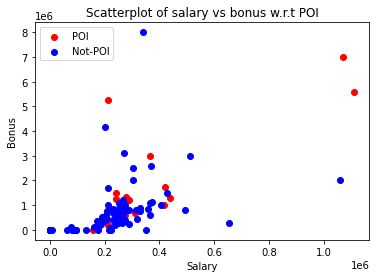

In [152]:
plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == True],enron_df_new['bonus'][enron_df_new['poi'] == True], color = 'r', label = 'POI')
plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == False],enron_df_new['bonus'][enron_df_new['poi'] == False],color = 'b', label = 'Not-POI')
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary vs bonus w.r.t POI")
plt.legend(loc='upper left')
plt.show() 

As the POI's were taking larger amounts of money as bonus, in addition to their high salary so it can be stated that the ratio of bonus to salary of the POI's will be higher as compared to that of non-POI's. 

#### Feature created :  bonus-to-salary_ratio

In [153]:
# Created a new feature
enron_df_new['bonus-to-salary_ratio'] = enron_df_new['bonus']/enron_df_new['salary']

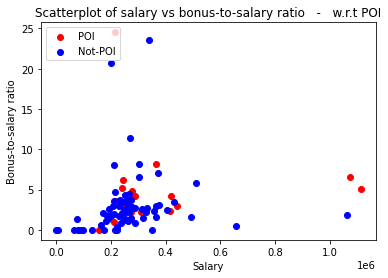

In [158]:
plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == True], enron_df_new['bonus-to-salary_ratio'][enron_df_new['poi'] == True], color = 'r', label = 'POI')
plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == False], enron_df_new['bonus-to-salary_ratio'][enron_df_new['poi'] == False],color = 'b', label = 'Not-POI')
    
plt.xlabel("Salary")
plt.ylabel("Bonus-to-salary ratio")
plt.title("Scatterplot of salary vs bonus-to-salary ratio   -   w.r.t POI")
plt.legend(loc='upper left')
plt.show() 

## Removing Outlier 2 : 'THE TRAVEL AGENCY IN THE PARK'

In [154]:
enron_df_new.loc['THE TRAVEL AGENCY IN THE PARK']

salary                            0
to_messages                       0
deferral_payments                 0
total_payments               362096
loan_advances                     0
bonus                             0
restricted_stock_deferred         0
deferred_income                   0
total_stock_value                 0
expenses                          0
from_poi_to_this_person           0
exercised_stock_options           0
from_messages                     0
other                        362096
from_this_person_to_poi           0
poi                           False
long_term_incentive               0
shared_receipt_with_poi           0
restricted_stock                  0
director_fees                     0
bonus-to-salary_ratio           NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

In [155]:
enron_df_new.drop('THE TRAVEL AGENCY IN THE PARK', axis = 0, inplace = True)
enron_df_new.shape

(144, 21)

## 2. Deferred_income, deferred_payment and total_payment 

According to [BusinessDictionary.com](http://www.businessdictionary.com/definition/deferred-payment.html) : 
- Deferred payment is "a loan arrangement in which the borrower is allowed to start making payments at some specified time in the future. Deferred payment arrangements are often used in retail settings where a person buys and receives an item with a commitment to begin making payments at a future date."

- [Deferred income](https://en.wikipedia.org/wiki/Deferred_income) : (also known as deferred revenue, unearned revenue, or unearned income) is, in accrual accounting, money received for goods or services which have not yet been delivered. According to the revenue recognition principle, it is recorded as a liability until delivery is made, at which time it is converted into revenue.

As Enron scam involved a lot of undisclosed assets and cheating public by selling assets to shell companies at end of each month and buying them back at the start of next month to hide the acounting losses so there are chances that lot of deferred revenue by the company was used by the POI's.

In [156]:
enron_df_new['deferred_income'].describe()

count    1.440000e+02
mean    -1.936833e+05
std      6.060111e+05
min     -3.504386e+06
25%     -3.708600e+04
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: deferred_income, dtype: float64

The __deferred_income__ feature has mostly negative values as it is the money which has to be returned by the company.

In [159]:
# Finding out the integer index locations of POIs and non-POIs
poi_rs = []
non_poi_rs = []
for i in range(len(enron_df_new['poi'])):
    if enron_df_new['poi'][i] == True:
        poi_rs.append(i+1)
    else:
        non_poi_rs.append(i+1)

print ("length poi list : ",len(poi_rs))
print ("length non-poi list : ",len(non_poi_rs))

length poi list :  18
length non-poi list :  126


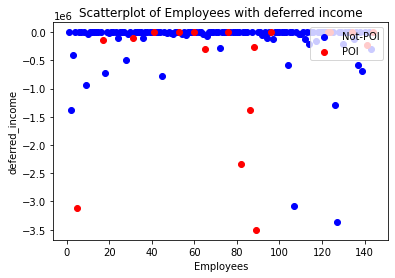

In [160]:
plt.scatter(non_poi_rs,
            enron_df_new['deferred_income'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(poi_rs,
            enron_df_new['deferred_income'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('Employees')
plt.ylabel('deferred_income')
plt.title("Scatterplot of Employees with deferred income")
plt.legend(loc='upper right')
plt.show()

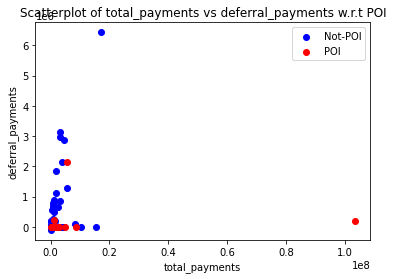

In [161]:
plt.scatter(enron_df_new['total_payments'][enron_df_new['poi'] == False],
            enron_df_new['deferral_payments'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(enron_df_new['total_payments'][enron_df_new['poi'] == True],
            enron_df_new['deferral_payments'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('total_payments')
plt.ylabel('deferral_payments')
plt.title("Scatterplot of total_payments vs deferral_payments w.r.t POI")
plt.legend(loc='upper right')
plt.show() 

From the above scatterplot it can be observed that majority of POIs have very low value of deferral payments as compared to the deferral_payments of non-POIs. 

So, from the above we can observe there are two outliers. The one having high value of total_payments is a POI and the other outlier with high value of deferral payments is a non-POI. I am removing the non-POI outlier.

In [162]:
enron_df_new['deferral_payments'].argmax()

126

### remove the 3rd outlier for 'deferral_payments'

In [163]:
enron_df_new.drop('FREVERT MARK A', axis = 0, inplace = True)
enron_df_new.shape

(143, 21)

In [164]:
# Finding out the integer index locations of POIs and non-POIs
poi_rs = []
non_poi_rs = []
for i in range(len(enron_df_new['poi'])):
    if enron_df_new['poi'][i] == True:
        poi_rs.append(i+1)
    else:
        non_poi_rs.append(i+1)

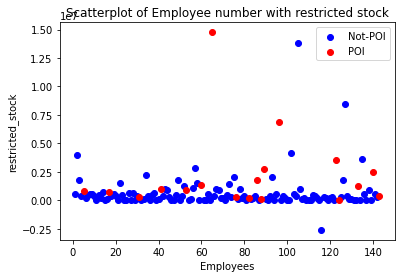

In [165]:
plt.scatter(non_poi_rs,
            enron_df_new['restricted_stock'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(poi_rs,
            enron_df_new['restricted_stock'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('Employees')
plt.ylabel('restricted_stock')
plt.title("Scatterplot of Employee number with restricted stock")
plt.legend(loc='upper right')
plt.show()

In [ ]:
enron_df_new['restricted_stock'].argmax()

#### 3. long_term_incentive

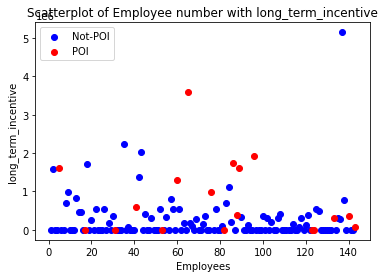

In [166]:
plt.scatter(non_poi_rs,
            enron_df_new['long_term_incentive'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(poi_rs,
            enron_df_new['long_term_incentive'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('Employees')
plt.ylabel('long_term_incentive')
plt.title("Scatterplot of Employee number with long_term_incentive")
plt.legend(loc='upper left')
plt.show()

In [167]:
enron_df_new['long_term_incentive'].argmax()

136

### Remove the 4th outlier for 'long_term_incentive'

In [168]:
enron_df_new.drop('MARTIN AMANDA K', axis = 0, inplace = True)
enron_df_new.shape

(142, 21)

#### 4. restricted_stock and restricted_stock_deferred

In [169]:
enron_df_new['restricted_stock_deferred'].describe()

count    1.420000e+02
mean     7.445196e+04
std      1.311155e+06
min     -1.787380e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.545629e+07
Name: restricted_stock_deferred, dtype: float64

In [170]:
enron_df_new['restricted_stock'].describe()

count    1.420000e+02
mean     8.512715e+05
std      2.010079e+06
min     -2.604490e+06
25%      3.536825e+04
50%      3.605280e+05
75%      6.987505e+05
max      1.476169e+07
Name: restricted_stock, dtype: float64

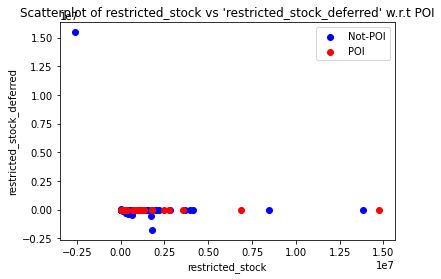

In [171]:
# Scatterplot of restricted_stock vs 'restricted_stock_deferred' w.r.t POI

plt.scatter(enron_df_new['restricted_stock'][enron_df_new['poi'] == False],
            enron_df_new['restricted_stock_deferred'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(enron_df_new['restricted_stock'][enron_df_new['poi'] == True],
            enron_df_new['restricted_stock_deferred'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('restricted_stock')
plt.ylabel('restricted_stock_deferred')
plt.title("Scatterplot of restricted_stock vs 'restricted_stock_deferred' w.r.t POI")
plt.legend(loc='upper right')
plt.show() 

So obtained an outlier in the feature __restricted_stock_deferred__. Also taking a quick look at the values of __restricted_stock_deferred__ most of the values are zeros and the remaining few are negative values. The outlier found here is for the enron employee __BHATNAGAR SANJAY__ who is not a POI and in this analysis i am removing this datapoint hoping that it may aid in classification.  

And at the other axis of the graph, the other maximum values are of a POI and a non-POI so no need to remove them. 

In [172]:
enron_df_new['restricted_stock_deferred'].argmax()

115

In [173]:
enron_df_new.loc['BHATNAGAR SANJAY']['poi']

False

### Did not remove the outlier for 'restricted_stock_deferred'

In [174]:
enron_df_new.drop('BHATNAGAR SANJAY', axis = 0, inplace = True)
enron_df_new.shape

(141, 21)

#### 5.  expenses

In [175]:
# Finding out the integer index locations of POIs and non-POIs
poi_rs = []
non_poi_rs = []
for i in range(len(enron_df_new['poi'])):
    if enron_df_new['poi'][i] == True:
        poi_rs.append(i+1)
    else:
        non_poi_rs.append(i+1)

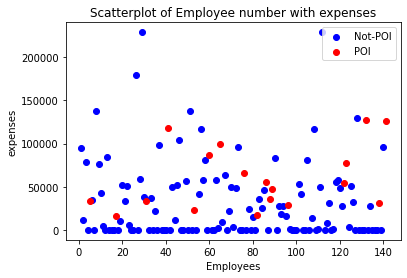

In [176]:
plt.scatter(non_poi_rs,
            enron_df_new['expenses'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(poi_rs,
            enron_df_new['expenses'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('Employees')
plt.ylabel('expenses')
plt.title("Scatterplot of Employee number with expenses")
plt.legend(loc='upper right')
plt.show()

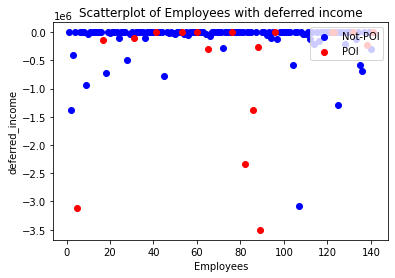

In [177]:
plt.scatter(non_poi_rs,
            enron_df_new['deferred_income'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(poi_rs,
            enron_df_new['deferred_income'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('Employees')
plt.ylabel('deferred_income')
plt.title("Scatterplot of Employees with deferred income")
plt.legend(loc='upper right')
plt.show()

## Email-Features
Also it can be thought that for doing such a big scam the POI's might have frequent contact between them via E-mails so by checking on the number of  e-mails transferred between POIs and an Employee we can be able to guess for the involvement of that person in that scam. So finding the fraction of the mail from and to this person with respect to the POI.

#### 1.  from_poi_to_this_person and from_this_person_to_poi

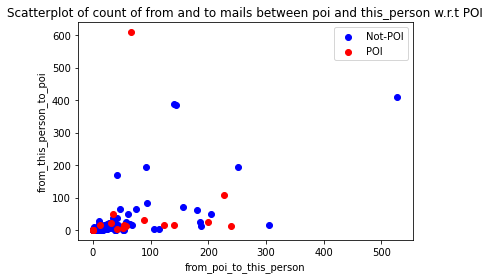

In [178]:
plt.scatter(enron_df_new['from_poi_to_this_person'][enron_df_new['poi'] == False],
            enron_df_new['from_this_person_to_poi'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(enron_df_new['from_poi_to_this_person'][enron_df_new['poi'] == True],
            enron_df_new['from_this_person_to_poi'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('from_poi_to_this_person')
plt.ylabel('from_this_person_to_poi')
plt.title("Scatterplot of count of from and to mails between poi and this_person w.r.t POI")
plt.legend(loc='upper right')
plt.show() 

#### Features created : fraction_mail_from_poi and fraction_mail_to_poi

In [179]:
enron_df_new['fraction_mail_from_poi'] = enron_df_new['from_poi_to_this_person']/enron_df_new['from_messages'] 
enron_df_new['fraction_mail_to_poi'] = enron_df_new['from_this_person_to_poi']/enron_df_new['to_messages']

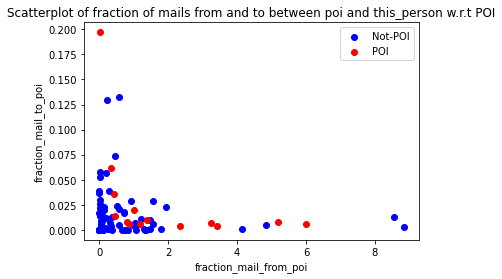

In [180]:
plt.scatter(enron_df_new['fraction_mail_from_poi'][enron_df_new['poi'] == False],
            enron_df_new['fraction_mail_to_poi'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(enron_df_new['fraction_mail_from_poi'][enron_df_new['poi'] == True],
            enron_df_new['fraction_mail_to_poi'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('fraction_mail_from_poi')
plt.ylabel('fraction_mail_to_poi')
plt.title("Scatterplot of fraction of mails from and to between poi and this_person w.r.t POI")
plt.legend(loc='upper right')
plt.show() 

From the above figure, the difference between POIs and non-POIs points can be clearly classified.  

So the total number of features in the dataframe after the data analysis is.

In [181]:
enron_df_new.columns

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees',
       'bonus-to-salary_ratio', 'fraction_mail_from_poi',
       'fraction_mail_to_poi'],
      dtype='object')

In [182]:
enron_df_new.shape

(141, 23)

In [183]:
new_features_list = enron_df_new.columns.values
new_features_list

array(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options',
       'from_messages', 'other', 'from_this_person_to_poi', 'poi',
       'long_term_incentive', 'shared_receipt_with_poi',
       'restricted_stock', 'director_fees', 'bonus-to-salary_ratio',
       'fraction_mail_from_poi', 'fraction_mail_to_poi'], dtype=object)

In [184]:
#clean all 'inf' values which we got if the person's from_messages = 0
enron_df_new = enron_df_new.replace('inf', 0)
enron_df_new = enron_df_new.fillna(0)
# Converting the above modified dataframe to a dictionary
enron_dict = enron_df_new.to_dict('index')

In [186]:
print ("Features of modified data_dictionary  \n")
print ("Total number of datapoints : ",len(enron_dict))
print ("Total number of features : ",len(enron_dict['METTS MARK']))

Features of modified data_dictionary  

Total number of datapoints :  141
Total number of features :  23


In [190]:
enron_dict['METTS MARK']

#enron_data["PRENTICE JAMES"]

{'salary': 365788.0,
 'to_messages': 807.0,
 'deferral_payments': 0.0,
 'total_payments': 1061827.0,
 'loan_advances': 0.0,
 'bonus': 600000.0,
 'restricted_stock_deferred': 0.0,
 'deferred_income': 0.0,
 'total_stock_value': 585062.0,
 'expenses': 94299.0,
 'from_poi_to_this_person': 38.0,
 'exercised_stock_options': 0.0,
 'from_messages': 29.0,
 'other': 1740.0,
 'from_this_person_to_poi': 1.0,
 'poi': False,
 'long_term_incentive': 0.0,
 'shared_receipt_with_poi': 702.0,
 'restricted_stock': 585062.0,
 'director_fees': 0.0,
 'bonus-to-salary_ratio': 1.6402943781644013,
 'fraction_mail_from_poi': 1.3103448275862069,
 'fraction_mail_to_poi': 0.0012391573729863693}

In [192]:
for key, value in enron_dict.items():
    print (key)
    print ("\n")
    for val in enron_dict[key].keys():
        print (val)
    break


METTS MARK


salary
to_messages
deferral_payments
total_payments
loan_advances
bonus
restricted_stock_deferred
deferred_income
total_stock_value
expenses
from_poi_to_this_person
exercised_stock_options
from_messages
other
from_this_person_to_poi
poi
long_term_incentive
shared_receipt_with_poi
restricted_stock
director_fees
bonus-to-salary_ratio
fraction_mail_from_poi
fraction_mail_to_poi


In [193]:
# Store to my_dataset for easy export below.
my_dataset = enron_dict

In [194]:
## Selecting features which i think might be important
features_list = ['poi', 'salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'deferral_payments', 'expenses', 
                 'restricted_stock_deferred', 'restricted_stock', 'deferred_income','fraction_mail_from_poi', 'total_payments',
                 'other', 'fraction_mail_to_poi', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 
                 'from_messages', 'shared_receipt_with_poi', 'loan_advances', 'director_fees', 'exercised_stock_options',
                'total_stock_value', 'restricted_stock']

In [195]:
len(features_list)

24

In [196]:
# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Task 4: Try a varity of classifiers

In [199]:
### split data into training and testing datasets
from sklearn.model_selection import cross_validate             #from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Stratified ShuffleSplit cross-validator
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=100, test_size=0.3,random_state = 42)

In [200]:
# Importing modules for feature scaling and selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [201]:
# Defining functions to be used via the pipeline
scaler = MinMaxScaler()
skb = SelectKBest(f_classif)
pca = PCA()

### Classifer 1 : Naive Bayes 

In [205]:
import warnings
warnings.filterwarnings('ignore')

In [206]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()

pipeline = Pipeline(steps = [("SKB", skb), ("NaiveBayes",clf_gnb)])
param_grid = {"SKB__k":[7,8,9,10,11,12,13,14,15,16,17,18,19]}

grid = GridSearchCV(pipeline, param_grid, verbose = 0, cv = sss, scoring = 'f1')

t0 = time()
grid.fit(features, labels)
print ("training time: ", round(time()-t0, 3), "s")

# best algorithm
clf = grid.best_estimator_

t0 = time()
# refit the best algorithm:
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print ("testing time: ", round(time()-t0, 3), "s")

training time:  3.509 s
testing time:  0.002 s


In [207]:
print ("Accuracy of GaussianNB classifer is  : ",accuracy_score(labels_test, prediction))
print ("Precision of GaussianNB classifer is : ",precision_score(prediction, labels_test))
print ("Recall of GaussianNB classifer is    : ",recall_score(prediction, labels_test))
print ("f1-score of GaussianNB classifer is  : ",f1_score(prediction, labels_test))

Accuracy of GaussianNB classifer is  :  0.8571428571428571
Precision of GaussianNB classifer is :  0.5
Recall of GaussianNB classifer is    :  0.5
f1-score of GaussianNB classifer is  :  0.5


In [208]:
grid.best_estimator_

Pipeline(steps=[('SKB', SelectKBest(k=13)), ('NaiveBayes', GaussianNB())])

In [209]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'expenses', 'deferred_income', 'fraction_mail_from_poi', 'total_payments', 'other', 'shared_receipt_with_poi', 'loan_advances', 'exercised_stock_options', 'total_stock_value']


In [210]:
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_scores

array([12.22577476, 12.43859125, 10.16452643,  9.8693666 ,  0.17417355,
        5.72977612,  0.80951347,  3.0325899 , 13.28758702, 10.59873318,
        9.36104698,  9.14145825,  4.95067898,  4.06628   ,  2.18629651,
        2.30636802,  0.06088887,  8.64902275,  7.65862709,  1.40909808,
       11.16645325, 10.19178425,  3.0325899 ])

In [211]:
grid.best_params_

{'SKB__k': 13}

In [214]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_selected_scores = feature_scores[features_selected_bool]
feature_selected_scores

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'expenses', 'deferred_income', 'fraction_mail_from_poi', 'total_payments', 'other', 'shared_receipt_with_poi', 'loan_advances', 'exercised_stock_options', 'total_stock_value']


array([12.22577476, 12.43859125, 10.16452643,  9.8693666 ,  5.72977612,
       13.28758702, 10.59873318,  9.36104698,  9.14145825,  8.64902275,
        7.65862709, 11.16645325, 10.19178425])

In [215]:
imp_features_df = pd.DataFrame({'Features_Selected':features_selected_list, 'Features_score':feature_selected_scores})
imp_features_df.sort_values('Features_score', ascending = False,inplace = True)
Rank = pd.Series(list(range(1,len(features_selected_list)+1)))
imp_features_df.set_index(Rank, inplace = True)
imp_features_df

,Features_Selected,Features_score
1,deferred_income,13.287587
2,bonus,12.438591
3,salary,12.225775
4,exercised_stock_options,11.166453
5,fraction_mail_from_poi,10.598733
6,total_stock_value,10.191784
7,long_term_incentive,10.164526
8,bonus-to-salary_ratio,9.869367
9,total_payments,9.361047
10,other,9.141458


## Classifier 2 : Decision Tree without PCA

In [217]:
from sklearn.tree import DecisionTreeClassifier
clf_dtree = DecisionTreeClassifier()

pipeline = Pipeline(steps = [("SKB", skb), ("dtree",clf_dtree)])
param_grid = {"SKB__k":[7,8,9,10,11,12,13,14,15,16,17,18,19],
              "dtree__criterion": ["gini", "entropy"],
              "dtree__min_samples_split": [2, 4, 8, 10]}


grid = GridSearchCV(pipeline, param_grid, verbose = 0, cv = sss, scoring = 'f1')

t0 = time()
#clf = clf.fit(features_train, labels_train)
grid.fit(features, labels)
print ("training time: ", round(time()-t0, 3), "s")

# best algorithm
clf = grid.best_estimator_

t0 = time()
# refit the best algorithm:
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print ("testing time: ", round(time()-t0, 3), "s")


print ("Accuracy of DT classifer is  : ",accuracy_score(labels_test, prediction))
print ("Precision of DT classifer is : ",precision_score(prediction, labels_test))
print ("Recall of DT classifer is    : ",recall_score(prediction, labels_test))
print ("f1-score of DT classifer is  : ",f1_score(prediction, labels_test))

training time:  30.387 s
testing time:  0.003 s
Accuracy of DT classifer is  :  0.8333333333333334
Precision of DT classifer is :  0.3333333333333333
Recall of DT classifer is    :  0.4
f1-score of DT classifer is  :  0.3636363636363636


In [218]:
# View the best parameters for the model found using grid search
print ('Best criterion:',grid.best_estimator_.named_steps['dtree'].criterion)

Best criterion: entropy


In [219]:
grid.best_params_

{'SKB__k': 15, 'dtree__criterion': 'entropy', 'dtree__min_samples_split': 2}

In [220]:
grid.best_estimator_

Pipeline(steps=[('SKB', SelectKBest(k=15)),
                ('dtree', DecisionTreeClassifier(criterion='entropy'))])

In [221]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'expenses', 'deferred_income', 'fraction_mail_from_poi', 'total_payments', 'other', 'fraction_mail_to_poi', 'from_poi_to_this_person', 'shared_receipt_with_poi', 'loan_advances', 'exercised_stock_options', 'total_stock_value']


In [222]:
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_scores

array([12.22577476, 12.43859125, 10.16452643,  9.8693666 ,  0.17417355,
        5.72977612,  0.80951347,  3.0325899 , 13.28758702, 10.59873318,
        9.36104698,  9.14145825,  4.95067898,  4.06628   ,  2.18629651,
        2.30636802,  0.06088887,  8.64902275,  7.65862709,  1.40909808,
       11.16645325, 10.19178425,  3.0325899 ])

In [224]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_selected_scores = feature_scores[features_selected_bool]
feature_selected_scores

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'expenses', 'deferred_income', 'fraction_mail_from_poi', 'total_payments', 'other', 'fraction_mail_to_poi', 'from_poi_to_this_person', 'shared_receipt_with_poi', 'loan_advances', 'exercised_stock_options', 'total_stock_value']


array([12.22577476, 12.43859125, 10.16452643,  9.8693666 ,  5.72977612,
       13.28758702, 10.59873318,  9.36104698,  9.14145825,  4.95067898,
        4.06628   ,  8.64902275,  7.65862709, 11.16645325, 10.19178425])

In [225]:
imp_features_df = pd.DataFrame({'Features_Selected':features_selected_list, 'Features_score':feature_selected_scores})
imp_features_df.sort_values('Features_score', ascending = False,inplace = True)
Rank = pd.Series(list(range(1,len(features_selected_list)+1)))
imp_features_df.set_index(Rank, inplace = True)
imp_features_df

,Features_Selected,Features_score
1,deferred_income,13.287587
2,bonus,12.438591
3,salary,12.225775
4,exercised_stock_options,11.166453
5,fraction_mail_from_poi,10.598733
6,total_stock_value,10.191784
7,long_term_incentive,10.164526
8,bonus-to-salary_ratio,9.869367
9,total_payments,9.361047
10,other,9.141458


## Classifier X. DT using SKB(est) and PCA

In [226]:
from sklearn.tree import DecisionTreeClassifier
clf_dtree = DecisionTreeClassifier()

pipeline = Pipeline(steps = [("SKB", skb), ("PCA",pca), ("dtree",clf_dtree)])
param_grid = {"SKB__k":[7,8,9,10,11,12,13,14,15,16,17,18], 
              "PCA__n_components":[2,3,4,5,6,7],
              "PCA__whiten":[True],
              "dtree__criterion": ["gini", "entropy"],
              "dtree__min_samples_split": [2, 4, 8, 10]}


grid = GridSearchCV(pipeline, param_grid, verbose = 0, cv = sss, scoring = 'f1')

t0 = time()
#clf = clf.fit(features_train, labels_train)
grid.fit(features, labels)
print ("training time: ", round(time()-t0, 3), "s")

# best algorithm
clf = grid.best_estimator_

t0 = time()
# refit the best algorithm:
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print ("testing time: ", round(time()-t0, 3), "s")

print  ("Accuracy of DT classifer is  : ",accuracy_score(labels_test, prediction))
print  ("Precision of DT classifer is : ",precision_score(prediction, labels_test))
print  ("Recall of DT classifer is    : ",recall_score(prediction, labels_test))
print  ("f1-score of DT classifer is  : ",f1_score(prediction, labels_test))

training time:  193.794 s
testing time:  0.005 s
Accuracy of DT classifer is  :  0.8333333333333334
Precision of DT classifer is :  0.16666666666666666
Recall of DT classifer is    :  0.3333333333333333
f1-score of DT classifer is  :  0.2222222222222222


In [232]:
# View the best parameters for the model found using grid search
print ('Best criterion:',grid.best_estimator_.named_steps['dtree'].criterion)

Best criterion: gini


In [227]:
grid.best_params_

{'PCA__n_components': 3,
 'PCA__whiten': True,
 'SKB__k': 12,
 'dtree__criterion': 'gini',
 'dtree__min_samples_split': 8}

In [228]:
grid.best_estimator_

Pipeline(steps=[('SKB', SelectKBest(k=12)),
                ('PCA', PCA(n_components=3, whiten=True)),
                ('dtree', DecisionTreeClassifier(min_samples_split=8))])

In [229]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'deferred_income', 'fraction_mail_from_poi', 'total_payments', 'other', 'shared_receipt_with_poi', 'loan_advances', 'exercised_stock_options', 'total_stock_value']


In [230]:
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_scores

array([12.22577476, 12.43859125, 10.16452643,  9.8693666 ,  0.17417355,
        5.72977612,  0.80951347,  3.0325899 , 13.28758702, 10.59873318,
        9.36104698,  9.14145825,  4.95067898,  4.06628   ,  2.18629651,
        2.30636802,  0.06088887,  8.64902275,  7.65862709,  1.40909808,
       11.16645325, 10.19178425,  3.0325899 ])

In [233]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_selected_scores = feature_scores[features_selected_bool]
feature_selected_scores

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'deferred_income', 'fraction_mail_from_poi', 'total_payments', 'other', 'shared_receipt_with_poi', 'loan_advances', 'exercised_stock_options', 'total_stock_value']


array([12.22577476, 12.43859125, 10.16452643,  9.8693666 , 13.28758702,
       10.59873318,  9.36104698,  9.14145825,  8.64902275,  7.65862709,
       11.16645325, 10.19178425])

In [234]:
imp_features_df = pd.DataFrame({'Features_Selected':features_selected_list, 'Features_score':feature_selected_scores})
imp_features_df.sort_values('Features_score', ascending = False,inplace = True)
Rank = pd.Series(list(range(1,len(features_selected_list)+1)))
imp_features_df.set_index(Rank, inplace = True)
imp_features_df

,Features_Selected,Features_score
1,deferred_income,13.287587
2,bonus,12.438591
3,salary,12.225775
4,exercised_stock_options,11.166453
5,fraction_mail_from_poi,10.598733
6,total_stock_value,10.191784
7,long_term_incentive,10.164526
8,bonus-to-salary_ratio,9.869367
9,total_payments,9.361047
10,other,9.141458


## Classifier 5 : KNN with PCA

In [235]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3,random_state = 42)
pipeline = Pipeline(steps = [("scaling", scaler), ("SKB", skb), ("PCA",pca), ("knn",clf_knn)])
param_grid = {"SKB__k":[7,8,9,10,11,12,13,14,15, 16, 17, 18], 
              "PCA__n_components":[2,3,4,5,6,7],
              "PCA__whiten":[True],
              "knn__n_neighbors": [3,4,5,6,7,8,9,11],
              #"knn__weights": ['uniform','distance'],
              #"knn__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

grid = GridSearchCV(pipeline, param_grid, verbose = 0, cv = sss, scoring = 'f1')

t0 = time()
#clf = clf.fit(features_train, labels_train)
grid.fit(features, labels)
print ("training time: ", round(time()-t0, 3), "s")

# best algorithm
clf = grid.best_estimator_

t0 = time()
# refit the best algorithm:
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print ("testing time: ", round(time()-t0, 3), "s")

print ("Accuracy of DT classifer is  : ",accuracy_score(labels_test, prediction))
print ("Precision of DT classifer is : ",precision_score(prediction, labels_test))
print ("Recall of DT classifer is    : ",recall_score(prediction, labels_test))
print ("f1-score of DT classifer is  : ",f1_score(prediction, labels_test))

training time:  31.021 s
testing time:  0.005 s
Accuracy of DT classifer is  :  0.8095238095238095
Precision of DT classifer is :  0.0
Recall of DT classifer is    :  0.0
f1-score of DT classifer is  :  0.0


In [236]:
grid.best_params_

{'PCA__n_components': 2,
 'PCA__whiten': True,
 'SKB__k': 11,
 'knn__n_neighbors': 5}

In [237]:
grid.best_estimator_

Pipeline(steps=[('scaling', MinMaxScaler()), ('SKB', SelectKBest(k=11)),
                ('PCA', PCA(n_components=2, whiten=True)),
                ('knn', KNeighborsClassifier())])

In [238]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'deferred_income', 'fraction_mail_from_poi', 'total_payments', 'other', 'shared_receipt_with_poi', 'exercised_stock_options', 'total_stock_value']


In [239]:
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_scores

array([12.22577476, 12.43859125, 10.16452643,  9.8693666 ,  0.17417355,
        5.72977612,  0.80951347,  3.0325899 , 13.28758702, 10.59873318,
        9.36104698,  9.14145825,  4.95067898,  4.06628   ,  2.18629651,
        2.30636802,  0.06088887,  8.64902275,  7.65862709,  1.40909808,
       11.16645325, 10.19178425,  3.0325899 ])

In [240]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_selected_scores = feature_scores[features_selected_bool]
feature_selected_scores

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'deferred_income', 'fraction_mail_from_poi', 'total_payments', 'other', 'shared_receipt_with_poi', 'exercised_stock_options', 'total_stock_value']


array([12.22577476, 12.43859125, 10.16452643,  9.8693666 , 13.28758702,
       10.59873318,  9.36104698,  9.14145825,  8.64902275, 11.16645325,
       10.19178425])

In [241]:
imp_features_df = pd.DataFrame({'Features_Selected':features_selected_list, 'Features_score':feature_selected_scores})
imp_features_df.sort_values('Features_score', ascending = False,inplace = True)
Rank = pd.Series(list(range(1,len(features_selected_list)+1)))
imp_features_df.set_index(Rank, inplace = True)
imp_features_df

,Features_Selected,Features_score
1,deferred_income,13.287587
2,bonus,12.438591
3,salary,12.225775
4,exercised_stock_options,11.166453
5,fraction_mail_from_poi,10.598733
6,total_stock_value,10.191784
7,long_term_incentive,10.164526
8,bonus-to-salary_ratio,9.869367
9,total_payments,9.361047
10,other,9.141458


## Classifier KNN without PCA

In [242]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3,random_state = 42)
pipeline = Pipeline(steps = [("scaling", scaler), ("SKB", skb),  ("knn",clf_knn)])
param_grid = {"SKB__k":[7,8,9,10,11,12,13,14,15, 16, 17, 18], 
              "knn__n_neighbors": [3,4,5,6,7,8,9,11,12,13,15],
              }

grid = GridSearchCV(pipeline, param_grid, verbose = 0, cv = sss, scoring = 'f1')

t0 = time()
#clf = clf.fit(features_train, labels_train)
grid.fit(features, labels)
print ("training time: ", round(time()-t0, 3), "s")

# best algorithm
clf = grid.best_estimator_

t0 = time()
# refit the best algorithm:
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print ("testing time: ", round(time()-t0, 3), "s")

print ("Accuracy of DT classifer is  : ",accuracy_score(labels_test, prediction))
print ("Precision of DT classifer is : ",precision_score(prediction, labels_test))
print ("Recall of DT classifer is    : ",recall_score(prediction, labels_test))
print ("f1-score of DT classifer is  : ",f1_score(prediction, labels_test))

training time:  6.148 s
testing time:  0.004 s
Accuracy of DT classifer is  :  0.8571428571428571
Precision of DT classifer is :  0.16666666666666666
Recall of DT classifer is    :  0.5
f1-score of DT classifer is  :  0.25


In [246]:
grid.best_params_

{'SKB__k': 8, 'knn__n_neighbors': 3}

In [ ]:
grid.best_estimator_

In [243]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'deferred_income', 'fraction_mail_from_poi', 'exercised_stock_options', 'total_stock_value']


In [ ]:
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_scores

In [244]:
features_selected_bool = grid.best_estimator_.named_steps['SKB'].get_support()
features_selected_list = [x for x,y in zip(features_list[1:], features_selected_bool) if y]
print ("Selected Features : \n",features_selected_list)
feature_scores =  grid.best_estimator_.named_steps['SKB'].scores_
feature_selected_scores = feature_scores[features_selected_bool]
feature_selected_scores

Selected Features : 
 ['salary', 'bonus', 'long_term_incentive', 'bonus-to-salary_ratio', 'deferred_income', 'fraction_mail_from_poi', 'exercised_stock_options', 'total_stock_value']


array([12.22577476, 12.43859125, 10.16452643,  9.8693666 , 13.28758702,
       10.59873318, 11.16645325, 10.19178425])

In [245]:
imp_features_df = pd.DataFrame({'Features_Selected':features_selected_list, 'Features_score':feature_selected_scores})
imp_features_df.sort_values('Features_score', ascending = False,inplace = True)
Rank = pd.Series(list(range(1,len(features_selected_list)+1)))
imp_features_df.set_index(Rank, inplace = True)
imp_features_df

,Features_Selected,Features_score
1,deferred_income,13.287587
2,bonus,12.438591
3,salary,12.225775
4,exercised_stock_options,11.166453
5,fraction_mail_from_poi,10.598733
6,total_stock_value,10.191784
7,long_term_incentive,10.164526
8,bonus-to-salary_ratio,9.869367
